In [6]:
# Importar bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow
import os
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import LSTM, Dense, Dropout

In [28]:
df = pd.read_csv('../../NVDA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-06-26,42.460999,42.764000,40.099998,40.632000,40.619839,594322000
1,2023-06-27,40.799000,41.939999,40.448002,41.875999,41.863464,462175000
2,2023-06-28,40.660000,41.845001,40.518002,41.117001,41.104691,582639000
3,2023-06-29,41.557999,41.599998,40.599998,40.821999,40.809780,380514000
4,2023-06-30,41.680000,42.549999,41.500999,42.301998,42.289337,501148000


In [33]:
df.shape

(252, 7)

In [29]:
# Paso 2: Preprocesar los datos
# Consideraremos solo la columna 'Close' para predicciones
data = df['Close'].values.reshape(-1, 1)

In [14]:
# Escalar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [15]:
# Crear secuencias de datos para el modelo LSTM
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

SEQ_LENGTH = 60
X, y = create_sequences(scaled_data, SEQ_LENGTH)

In [35]:
print(len(X),len(y))

192 192


In [18]:
# Dividir los datos en conjuntos de entrenamiento y prueba
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [19]:
# Reshape de los datos para que sean compatibles con LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [23]:
# Paso 3: Construir el modelo LSTM
model = tensorflow.keras.models.Sequential()
model.add(tensorflow.keras.layers.LSTM(units=50, return_sequences=True, input_shape=(SEQ_LENGTH, 1)))
model.add(tensorflow.keras.layers.Dropout(0.2))
model.add(tensorflow.keras.layers.LSTM(units=50, return_sequences=False))
model.add(tensorflow.keras.layers.Dropout(0.2))
model.add(tensorflow.keras.layers.Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [24]:
# Entrenar el modelo
model.fit(X_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - loss: 0.0439
Epoch 2/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - loss: 0.0089
Epoch 3/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.0063
Epoch 4/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0058
Epoch 5/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0033
Epoch 6/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0032
Epoch 7/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - loss: 0.0032
Epoch 8/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0029
Epoch 9/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - loss: 0.0029
Epoch 10/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - loss: 0.0025
Epoch 11/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - loss: 0.0027
Epoch 12/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0021
Epoch 13/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0023
Epoch 14/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0023
Epoch 15/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - loss: 0.0024
Epoch 16/25
5/5 ━━━━━━━━━━━━━

In [25]:
# Paso 4: Evaluar el modelo
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 435ms/step


In [26]:
# Calcular el error
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print(f'RMSE: {rmse}')

RMSE: 101.74793254107794


In [43]:
# Visualizar los resultados
train = df[:split]
valid = df[df.shape[0]-predictions.shape[0]:]




In [42]:
df.shape

(252, 7)

In [44]:
valid.shape

(39, 7)

In [41]:
predictions.shape

(39, 1)

In [45]:
valid['Predictions'] = predictions

/var/folders/rq/z5qnpr752655sny11d2sv5ph0000gn/T/ipykernel_11915/568117345.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


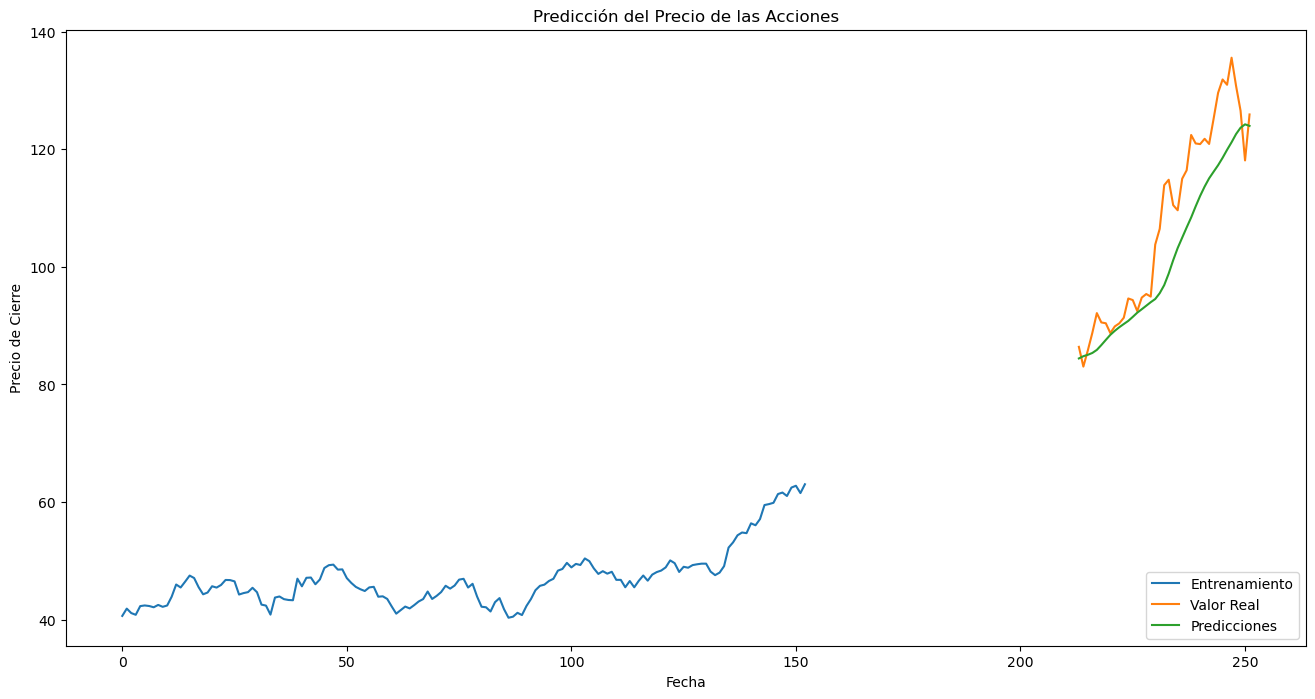

In [48]:
%matplotlib inline
plt.figure(figsize=(16, 8))
plt.title('Predicción del Precio de las Acciones')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Entrenamiento', 'Valor Real', 'Predicciones'], loc='lower right')
plt.show()